In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 20

In [2]:
df = pd.read_json('News_Category_Dataset_v2.json', lines = True)

In [3]:
df.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [4]:
df['text'] = df['headline'] + ' ' + df['short_description']

In [5]:
df.head()

,authors,category,date,headline,link,short_description,text
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...


In [6]:
df['text'] = df['text'].str.replace('.', ' ').str.replace(',', ' ').str.replace('\'', ' ').str.replace('\"', ' ').str.replace('\\', ' ').str.replace('!', ' ').str.replace('?', ' ').str.replace(';', ' ').str.replace(':', ' ').str.replace('(', ' ').str.replace(')', ' ').str.replace('_', ' ').str.replace('“', ' ').str.replace('”', ' ').str.replace('`', ' ').str.replace('’', ' ').str.replace('#', ' ').str.replace('--', ' ')
df['text'] = df['text'].str.lower()

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tatjana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [9]:
ar=[]
for d in df['text']:
    ar.append(len(d.split()))

df['num_word'] = ar
df = df[df['num_word'] >= 7]

In [10]:
df = df.drop(['headline', 'short_description', 'link', 'date', 'authors', 'num_word'], 1)
df.describe

<bound method NDFrame.describe of              category                                               text
0               CRIME  2 mass shootings texas last week 1 tv left hus...
1       ENTERTAINMENT  smith joins diplo nicky jam 2018 world cup off...
2       ENTERTAINMENT  hugh grant marries first time age 57 actor lon...
3       ENTERTAINMENT  jim carrey blasts castrato adam schiff democra...
4       ENTERTAINMENT  julianna margulies uses donald trump poop bags...
5       ENTERTAINMENT  morgan freeman devastated sexual harassment cl...
6       ENTERTAINMENT  donald trump lovin new mcdonald jingle tonight...
7       ENTERTAINMENT  watch amazon prime new week great mini-series ...
8       ENTERTAINMENT  mike myers reveals like fourth austin powers f...
9       ENTERTAINMENT  watch hulu new week getting recent academy awa...
...               ...                                                ...
200843           TECH  good games possible think people play zynga ga...
200844           

In [11]:
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'ARTS', 'FIFTY',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [12]:
df['category'].unique().size

41

In [13]:
df['category'] = df['category'].replace({'THE WORLDPOST' : 'WORLD NEWS', 'WORLDPOST' : 'WORLD NEWS', 'COLLEGE' : 'EDUCATION', 'PARENTING' : 'PARENTS', 'STYLE' : 'STYLE & BEAUTY', 'GREEN' : 'ENVIRONMENT', 'TASTE' : 'FOOD & DRINK', 'WELLNESS' : 'HEALTHY LIVING', 'ARTS' : 'ARTS & CULTURE', 'CULTURE & ARTS' : 'ARTS & CULTURE'})

In [14]:
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'PARENTS',
       'ARTS & CULTURE', 'STYLE & BEAUTY', 'ENVIRONMENT', 'FOOD & DRINK',
       'HEALTHY LIVING', 'GOOD NEWS', 'FIFTY', 'HOME & LIVING', 'DIVORCE',
       'WEDDINGS', 'MONEY'], dtype=object)

In [15]:
df['category'].unique().size

31

In [18]:
df.to_json(r'preprocessing_News_Category_Dataset_v2.json', orient = 'records')

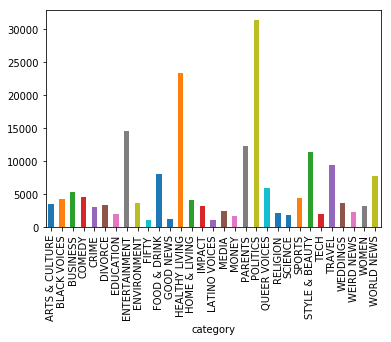

In [19]:
df.groupby('category')['text'].count().plot(kind='bar')